## 1. Завантаження, знайомство з даними та підготовка їх до аналізу

Для початку імпортуємо необхідні бібліотеки, завантажимо датасети та уніфіюємо назви колонок у форматі snake_case для зрочної роботи.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
# Завантаження даних
orders_data_path = './data/orders.csv'
supliers_data_path = './data/product-supplier.csv'

orders_df = pd.read_csv(orders_data_path)
supliers_df = pd.read_csv(supliers_data_path)

# Унфікація назв колонок
for df in [orders_df, supliers_df]:
    df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

#### 1.1 Перегляд та підготовка даних датасету orders

In [81]:
# Переглянемо як та які дані зберігаються в датасеті orders
orders_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


In [82]:
orders_df_shape = orders_df.shape
print(f"Набір даних містить {orders_df_shape[0]} рядків та {orders_df_shape[1]} колонок")

Набір даних містить 185013 рядків та 9 колонок


In [83]:
# Перевірка на пусті значення
order_missing_values = orders_df.isna().sum()
order_missing_values

customer_id                          0
customer_status                      0
date_order_was_placed                0
delivery_date                        0
order_id                             0
product_id                           0
quantity_ordered                     0
total_retail_price_for_this_order    0
cost_price_per_unit                  0
dtype: int64

Висновок: датасет не містить пустих значень.

In [84]:
# Переглянемо типи даних, що зберігаються в датасеті orders за колонками, щоб зрозуміти чи необхідно змінювати їх для правильного аналізу
orders_df.dtypes

customer_id                            int64
customer_status                       object
date_order_was_placed                 object
delivery_date                         object
order_id                               int64
product_id                             int64
quantity_ordered                       int64
total_retail_price_for_this_order    float64
cost_price_per_unit                  float64
dtype: object

Висновок: з отриманих результатів можна зробити висновок, що дані в колонці "date_order_was_placed" та "delivery_date" відображено в неправильному форматі, тож їх треба привести до типу Date.

In [85]:
# Змінемо тип даних на Date в колонках  "date_order_was_placed" та "delivery_date" 
date_columns = ["date_order_was_placed", "delivery_date"]  # Назви потрібних колонок

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], format="%d-%b-%y")

# orders_df.head()
orders_df.dtypes

customer_id                                   int64
customer_status                              object
date_order_was_placed                datetime64[ns]
delivery_date                        datetime64[ns]
order_id                                      int64
product_id                                    int64
quantity_ordered                              int64
total_retail_price_for_this_order           float64
cost_price_per_unit                         float64
dtype: object

In [86]:
# Також вважаю за потрібне уніфікувати значення в колонці customer_status 
# та конвертувати все до нижнього регістру, щоб повсюди мати однаковий формат 
# і було зручно працювати з ними.

orders_df.customer_status = orders_df.customer_status.apply(lambda value: value.lower())
orders_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit
0,579,silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70
1,7574,silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95
2,28861,gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80
3,43796,gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05
4,54673,gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30


#### 1.2 Перегляд та підготовка даних датасету product-supplier

In [87]:
# Переглянемо як та які дані зберігаються в датасеті product-supplier
supliers_df.head()

,product_id,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50


In [88]:
supliers_df_shape = supliers_df.shape
print(f"Набір даних містить {supliers_df_shape[0]} рядків та {supliers_df_shape[1]} колонок")

Набір даних містить 5504 рядків та 8 колонок


In [89]:
# Перевірка на пусті значення
supliers_missing_values = supliers_df.isna().sum()
supliers_missing_values

product_id          0
product_line        0
product_category    0
product_group       0
product_name        0
supplier_country    0
supplier_name       0
supplier_id         0
dtype: int64

Висновок: датасет не містить пустих значень

In [90]:
# Переглянемо типи даних, що зберігаються в датасеті orders за колонками, щоб зрозуміти чи необхідно змінювати їх для правильного аналізу
supliers_df.dtypes

product_id           int64
product_line        object
product_category    object
product_group       object
product_name        object
supplier_country    object
supplier_name       object
supplier_id          int64
dtype: object

Висновок: з отриманих даних можна сказати, що дані містять правильні типи тож немає необхідності зміни типів для даного датасету.

## 2. Аналіз даних

### 2.1 Кількість унікальних кастомерів по статусам

Кількість унікальних кастомерів по статусам customer_status
gold        42961
platinum     3982
silver      43737
Name: customer_id, dtype: int64
Всього унікальних кастомерів 90680


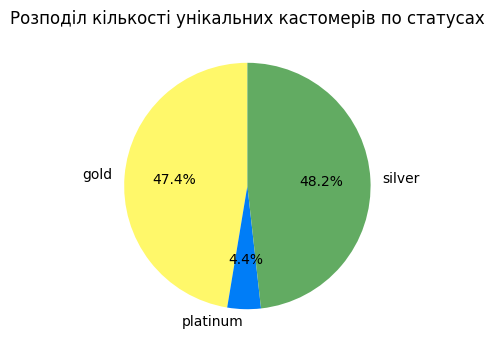

In [91]:
# Рахуємо кількість кастомерів для кожного статусу та їх загальну кількість
unique_customers_per_status = orders_df.groupby("customer_status")["customer_id"].nunique()
total_unique_cusotmers = unique_customers_per_status.sum()
print("Кількість унікальних кастомерів по статусам", unique_customers_per_status);
print("Всього унікальних кастомерів", unique_customers_per_status.sum());

# Відображаємо на круговій діаграмі
plt.figure(figsize=(4, 4))
plt.pie(unique_customers_per_status, labels=unique_customers_per_status.index, autopct="%1.1f%%", startangle=90, colors=["#fff86a", "#007df7", "#62ab62"])
plt.title("Розподіл кількості унікальних кастомерів по статусах")
plt.show()

Висновок: з отриманих даних видно, що при загальній кількості покупців 90680 маємо наступний розподіл:
 - зі статусом Silver маємо 43737 покупців, що становить 48.2% від загальної кількості;
 - зі статусом Gold маємо 42961 покупців, що становить 47.4% від загальної кількості;
 - зі статусом Platinum маємо 3982 покупців, що становить 4.4% від загальної кількості.

### 2.2 Кількість замовлень за статусами

Кількість унікальних замовлень по статусам customer_status
gold        88278
platinum     4194
silver      92541
Name: order_id, dtype: int64
Всього унікальних замовлень 185013


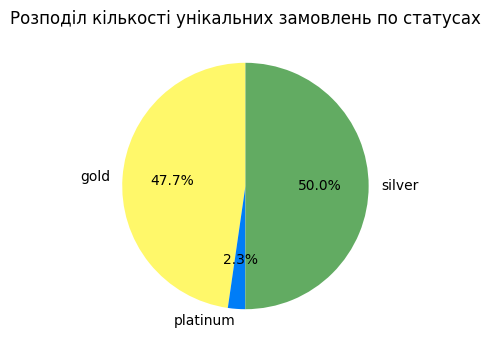

In [92]:
# Рахуємо кількість замовлень для кожного статусу та їх загальну кількість
unique_orders_per_status = orders_df.groupby("customer_status")["order_id"].nunique()
total_unique_orders = unique_orders_per_status.sum()
print("Кількість унікальних замовлень по статусам", unique_orders_per_status);
print("Всього унікальних замовлень", total_unique_orders.sum());

# Відображаємо на круговій діаграмі
plt.figure(figsize=(4, 4))
plt.pie(unique_orders_per_status, labels=unique_orders_per_status.index, autopct="%1.1f%%", startangle=90, colors=["#fff86a", "#007df7", "#62ab62"])
plt.title("Розподіл кількості унікальних замовлень по статусах")
plt.show()

Висновок: з отриманих даних видно, що при загальній кількості отриманих замовлень 185013 маємо наступний розподіл:
 - зі статусом Silver маємо 92541 покупців, що становить 50.0% від загальної кількості;
 - зі статусом Gold маємо 88278 покупців, що становить 47.7% від загальної кількості;
 - зі статусом Platinum маємо 4194 покупців, що становить 2.3% від загальної кількості.

### 2.3 Розподіл суми замовлень за статусами

Загальна сума замовлень:  25641503.32


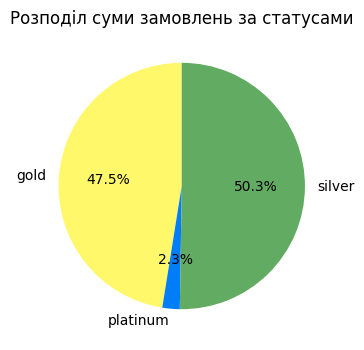

In [93]:
# Рахуємо суму замовлень по статусах
total_sales_per_status = orders_df.groupby("customer_status")["total_retail_price_for_this_order"].sum()
total_sales = round(total_sales_per_status.sum(), 2)
print("Загальна сума замовлень: ", total_sales)

# Відображаємо на круговій діаграмі
plt.figure(figsize=(4, 4))
plt.pie(total_sales_per_status, labels=total_sales_per_status.index, autopct="%1.1f%%", startangle=90, colors=["#fff86a", "#007df7", "#62ab62"])
plt.title("Розподіл суми замовлень за статусами")
plt.show()

Висновок: з отриманих вище результатів видно, що розподів покупців, замовлень і сум замовлень по статусам, приблизно рівні. Тож основними покупцями є клієнти зі статусами Silver і Gold. Вони є цільовою аудиторією, яка приносить найбільше доходу.

### 2.4 Динаміка замовлень по датам 

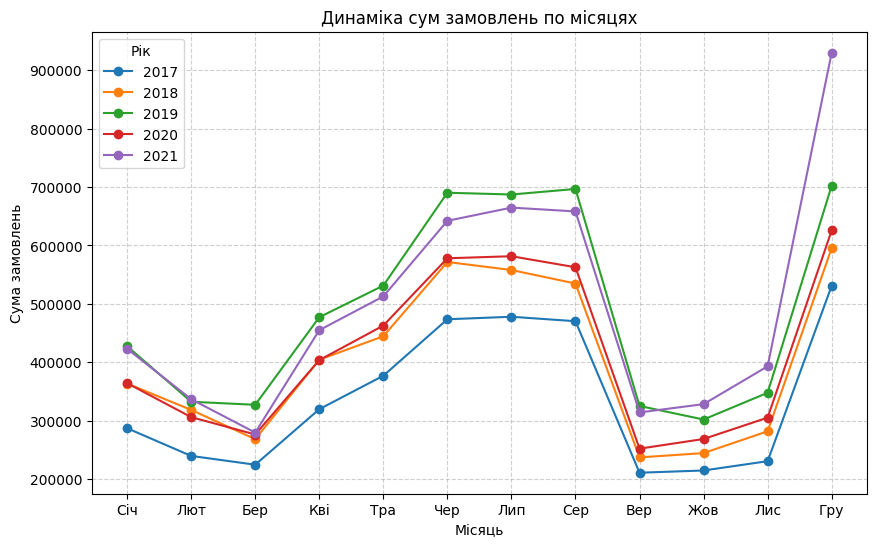

In [94]:
# Додаємо рік і місяць для групування
orders_df["year"] = orders_df["date_order_was_placed"].dt.year
orders_df["month"] = orders_df["date_order_was_placed"].dt.month

# Групуємо дані: сума замовлень за місяцями для кожного року
monthly_sales = orders_df.groupby(["year", "month"])["total_retail_price_for_this_order"].sum().unstack(level=0)

# Візуалізація
plt.figure(figsize=(10, 6))
for year in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[year], marker="o", label=str(year))

# Оформлення графіка
plt.xlabel("Місяць")
plt.ylabel("Сума замовлень")
plt.title("Динаміка сум замовлень по місяцях")
plt.xticks(ticks=range(1, 13), labels=[
    "Січ", "Лют", "Бер", "Кві", "Тра", "Чер", "Лип", "Сер", "Вер", "Жов", "Лис", "Гру"
])
plt.legend(title="Рік")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Висновок: З отриманого графіку, чітко простежується сезонність. Видно, що історично найгіршими періодами є лютий-березень та вересень-листопад. В той час як квітень-серпень та грудень приносять найбільше доходу. Окрім цього простежується щорічне збільшення доходу.

### 2.5 Відсотковий розподіл товарів за лінійками (Product Line).

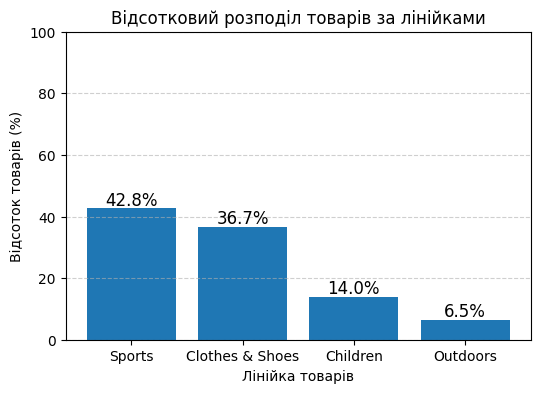

In [95]:
product_distribution = supliers_df["product_line"].value_counts(normalize=True) * 100  # Відсотки

# Побудова стовпчикової діаграми
plt.figure(figsize=(6, 4))
plt.bar(product_distribution.index, product_distribution, )

# Додаємо підписи
plt.xlabel("Лінійка товарів")
plt.ylabel("Відсоток товарів (%)")
plt.title("Відсотковий розподіл товарів за лінійками")
plt.ylim(0, 100)  # Встановлюємо межі для осі Y
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Додаємо відсотки над стовпчиками
for index, value in enumerate(product_distribution):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12)

# Показуємо графік
plt.show()

Висновок: Як видно з отриманої візуалізації маємо 4 лінійки товарів. Найбільшу частину займає лінійка "Sports" - 42.8%, найменшу частну товари лінійки "Outdoors" - 6.5%.

### 2.6 Розподіл доходу за категоріями товару. Визначення які категорії товарів продаються найкраще і найгірше.

In [96]:
# Спочатку зробимо об'єднання таблиць за product_id
merged_df = pd.merge(orders_df, supliers_df, on="product_id", how="inner")
merged_df.head()

,customer_id,customer_status,date_order_was_placed,delivery_date,order_id,product_id,quantity_ordered,total_retail_price_for_this_order,cost_price_per_unit,year,month,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.7,2017,1,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,silver,2017-03-11,2017-03-11,123079335,220101400106,1,46.3,20.7,2017,3,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
2,17556,gold,2017-06-09,2017-06-09,123073344,220101400106,3,138.9,20.7,2017,6,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
3,51989,gold,2017-06-16,2017-06-16,123011653,220101400106,2,92.6,20.7,2017,6,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
4,48644,gold,2017-12-12,2017-12-24,123101767,220101400106,6,277.8,20.7,2017,12,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


In [97]:
# Групуємо за лінійкою товарів та категорією
line_category_groups = merged_df.groupby("product_line")["product_category"].unique()

# Виводимо результат текстом
for line, categories in line_category_groups.items():
    print(f"Лінійка {line}: {', '.join(categories)}")

Лінійка Children: Children Sports
Лінійка Clothes & Shoes: Clothes, Shoes
Лінійка Outdoors: Outdoors
Лінійка Sports: Golf, Assorted Sports Articles, Swim Sports, Winter Sports, Running - Jogging, Indoor Sports, Team Sports, Racket Sports


Отримали назви категорій для кожної лінійки. Подивимося, який розподіл товарів по категоріям.

Найкраща категорія: Outdoors (22.2%)
Найгірша категорія: Swim Sports (1.1%)


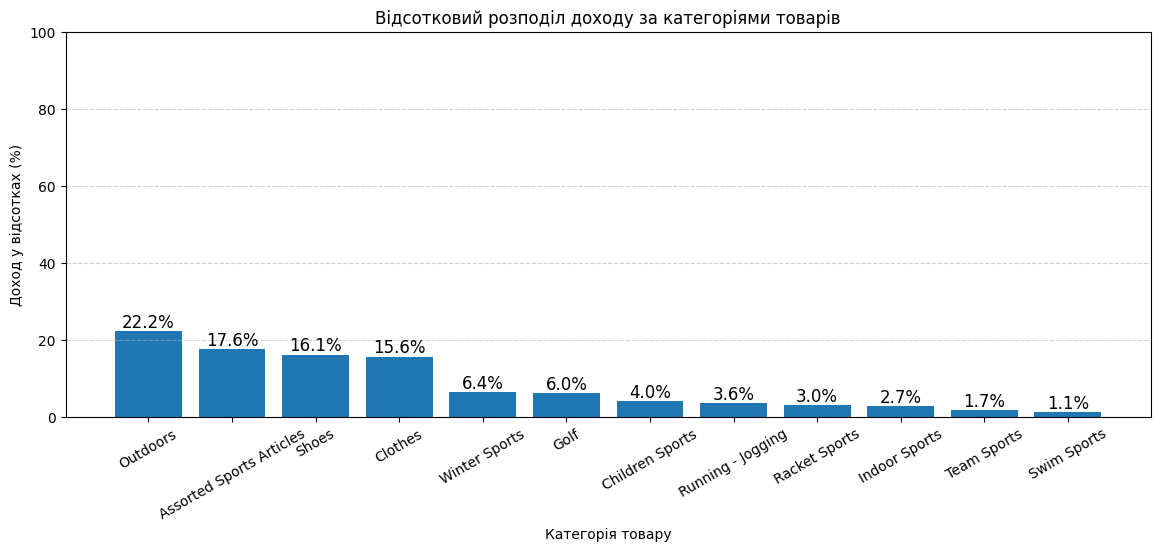

In [98]:
# Створюємо зведену таблицю для підрахунку доходу по категоріях
revenue_by_category = merged_df.pivot_table(values="total_retail_price_for_this_order", 
                                     index="product_category", aggfunc="sum")

# Додаємо відсотковий розподіл
total_revenue = revenue_by_category["total_retail_price_for_this_order"].sum()
revenue_by_category["percentage"] = (revenue_by_category["total_retail_price_for_this_order"] / total_revenue) * 100

# Сортуємо за спаданням доходу
revenue_by_category = revenue_by_category.sort_values(by="percentage", ascending=False)

# Відображаємо найкращу та найгіршу категорію у відсотках
best_category = revenue_by_category.idxmax()["percentage"]
worst_category = revenue_by_category.idxmin()["percentage"]

print(f"Найкраща категорія: {best_category} ({revenue_by_category.loc[best_category, 'percentage']:.1f}%)")
print(f"Найгірша категорія: {worst_category} ({revenue_by_category.loc[worst_category, 'percentage']:.1f}%)")

# Побудова стовпчикової діаграми
plt.figure(figsize=(14, 5))
plt.bar(revenue_by_category.index, revenue_by_category["percentage"])

# Додаємо підписи
plt.xlabel("Категорія товару")
plt.ylabel("Доход у відсотках (%)")
plt.title("Відсотковий розподіл доходу за категоріями товарів")
plt.xticks(rotation=30)
plt.ylim(0, 100)  # Межі для відсоткової шкали
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Додаємо значення у відсотках над стовпчиками
for index, value in enumerate(revenue_by_category["percentage"]):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12)

# Показуємо графік
plt.show()

Висновок: з отриманих результатів бачимо, що найбільшу частку за сумою замовлення займає категорія "Outdoors" - 22.2%, найменшу "Swim Sports" - 1.1%

### 2.7 Як товари продаються за місяцями.

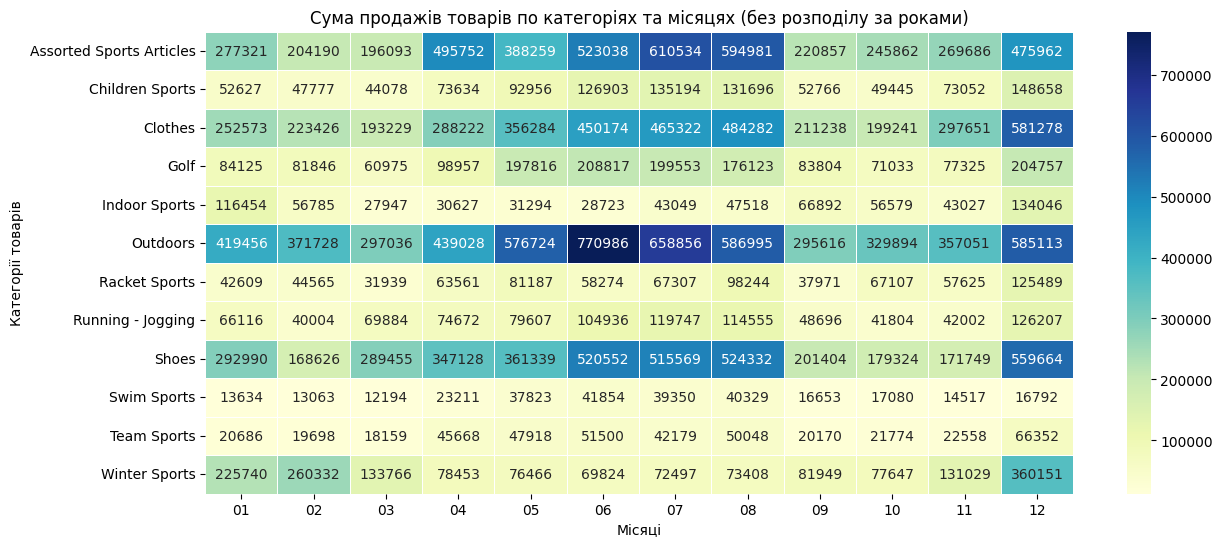

In [99]:
# Створюємо колонку для місяця без року
merged_df['month'] = merged_df['date_order_was_placed'].dt.month.astype(str).str.zfill(2)  # Формат ММ (01, 02, ..., 12)

# Створюємо зведену таблицю: місяці по колонках, категорії по рядках, значення - сума продажів
pivot_table = merged_df.pivot_table(values='total_retail_price_for_this_order', 
                             index='product_category', columns='month', aggfunc='sum', fill_value=0)

# Візуалізація за допомогою теплової карти (heatmap)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)

# Додаємо підписи та заголовок
plt.title("Сума продажів товарів по категоріях та місяцях (без розподілу за роками)")
plt.xlabel("Місяці")
plt.ylabel("Категорії товарів")

# Показуємо графік
plt.show()

Висновок: дана зводна таблиця наочно демонструє дохід за категоріями у різні місяці. На основі цих даних можна планувати макретингові стратегії. Наприклад, товари категорії "Outdoors" приносять найбільше прибутку у червні, в той час як "Winter sports" мають попит у зимові місяці. В той же час є категорії товарів, які цілий рік мають приблизно однакові продажі і не мають вираженної сезонності, наприклад, "Swim sports" та "Team sports". 

Примітка: в зводній таблиці значення продажів рахуються як сума продажів за місяць по категорії по кожному року, оскільки як видно з графіку в питанні 2.4 продажі, щорічно зростаютть приблизно однаковою

### 2.8 Відсотковий розподіл доходу від продажів товарів за категоріями та країнам постачальників

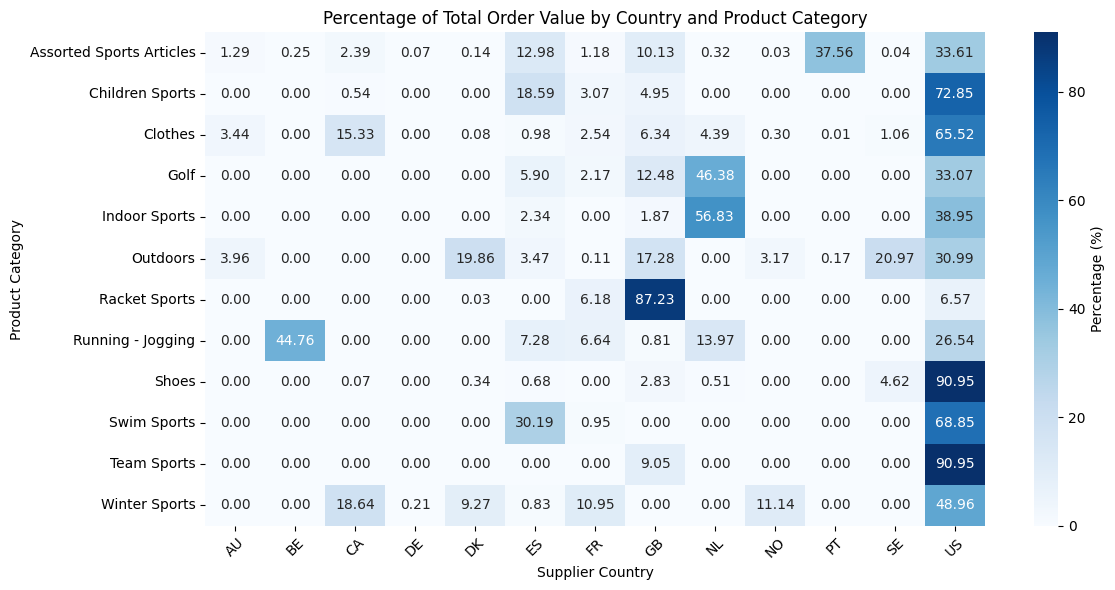

In [106]:
# Створюємо Pivot Table для суми замовлених товарів
pivot_table = merged_df.pivot_table(
    values='total_retail_price_for_this_order', 
    index='product_category',  # Рядки — категорії продуктів
    columns='supplier_country',  # Колонки — країни постачальників
    aggfunc='sum',  # Функція агрегації — сума
    fill_value=0  # Заповнюємо пропуски нулями
)

# Нормалізуємо таблицю в відсотки (по кожній колонці)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Візуалізація за допомогою seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title('Percentage of Total Order Value by Country and Product Category')
plt.ylabel('Product Category')
plt.xlabel('Supplier Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Показуємо графік
plt.show()

Висновок: з отриманої зводної таблиці можна легко визначати, які товари є найбільш і найменш популярими за країнами постачальників. Наприклад, чітко видно, що більшість товарів замовляють з Америки, хоча товари категорії "Racket Sports" найбільше замовляють з Великобританії.

### 2.9 Аналіз доходу по постачальникам

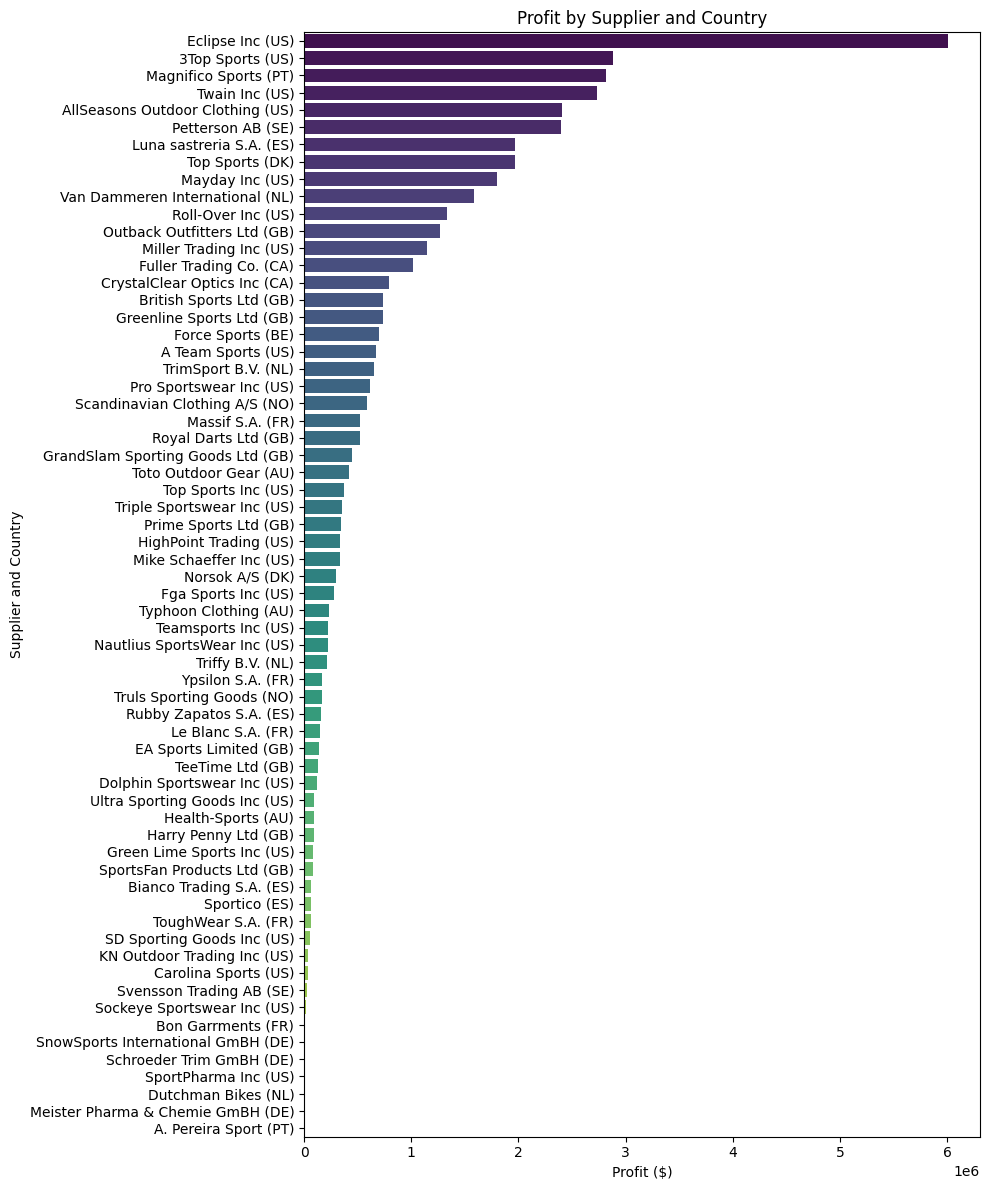

In [108]:
# Обчислюємо прибуток (Сума замовлення - Собівартість)
merged_df['profit'] = merged_df['total_order_value'] - merged_df['total_cost_value']

# Створюємо новий стовпець, який комбінує постачальника та країну
merged_df['supplier_name_country'] = merged_df['supplier_name'] + ' (' + merged_df['supplier_country'] + ')'

# Групуємо за постачальниками та країнами і обчислюємо сумарний прибуток
profit_by_supplier_country = merged_df.groupby('supplier_name_country')['profit'].sum().reset_index()

# Сортуємо за прибутком у спадаючому порядку
profit_by_supplier_country = profit_by_supplier_country.sort_values(by='profit', ascending=False)

# Візуалізація: горизонтальна стовпчикова діаграма
plt.figure(figsize=(10, 12))
sns.barplot(data=profit_by_supplier_country, x='profit', y='supplier_name_country', hue='supplier_name_country', palette='viridis', legend=False)

# Додавання заголовка та підписів
plt.title('Profit by Supplier and Country')
plt.xlabel('Profit ($)')
plt.ylabel('Supplier and Country')

# Показуємо графік
plt.tight_layout()
plt.show()

Висновок: Найбільші прибутки спостерігаються у компаній "Eclipse Inc", "3Top Sports", "Magnifico Sport", "Twain Inc", "AllSeasons Outdoor Clothing".

### 2.10 Які товари є найпопулярнішими серед постачальників з найбільшими прибутками

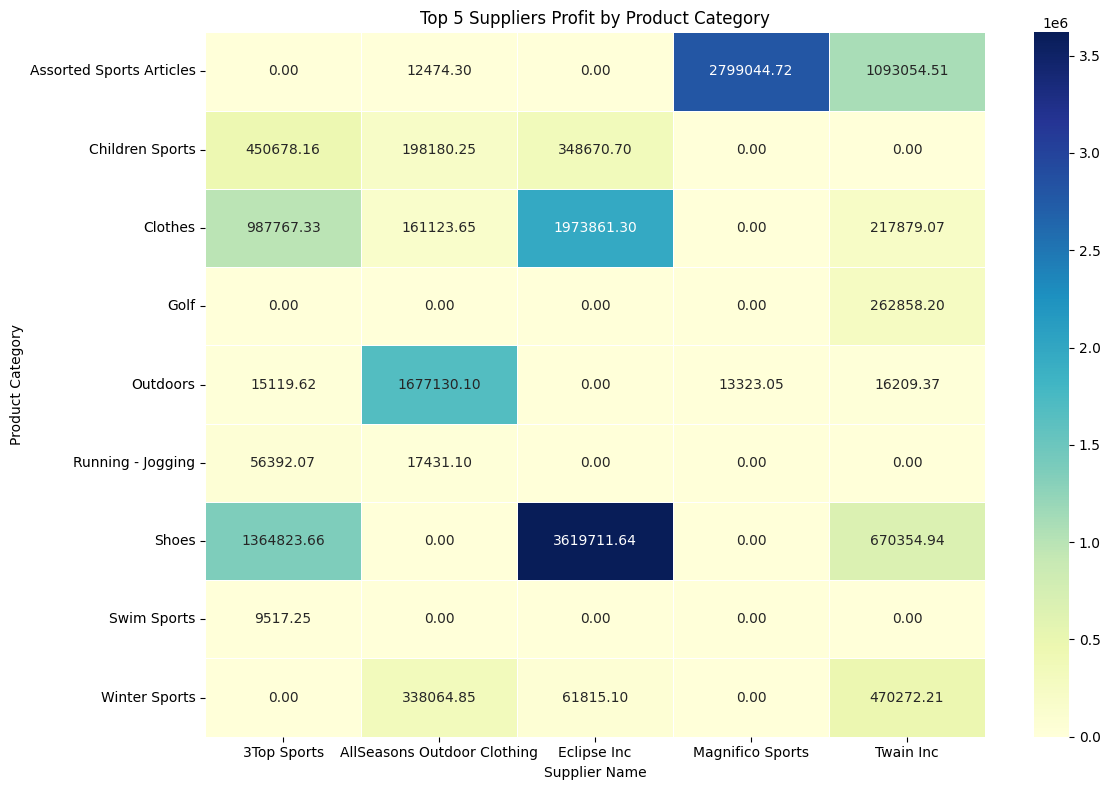

In [111]:
# Групуємо за постачальниками та категоріями і обчислюємо сумарний прибуток
profit_by_supplier_category = merged_df.groupby(['supplier_name', 'product_category'])['profit'].sum().reset_index()

# Знаходимо топ 5 постачальників з найбільшими прибутками
top_5_suppliers = profit_by_supplier_category.groupby('supplier_name')['profit'].sum().nlargest(5).index

# Фільтруємо дані для топ 5 постачальників
top_5_profit_by_supplier_category = profit_by_supplier_category[profit_by_supplier_category['supplier_name'].isin(top_5_suppliers)]

# Створюємо pivot table: постачальники як колонки, категорії як рядки
pivot_table = top_5_profit_by_supplier_category.pivot_table(
    index='product_category', 
    columns='supplier_name', 
    values='profit', 
    aggfunc='sum', 
    fill_value=0
)



# Візуалізація: теплова карта для pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Top 5 Suppliers Profit by Product Category')
plt.xlabel('Supplier Name')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()